### End


In [ ]:
Sys.setenv(LANG = "en")

$y_i = \alpha + \beta*x_i + e_i  = 10 + 2*x_i + e_i  $

$x_i = e_i - 0.9 * e_{i-1}$

In [1]:
e_2 = rnorm(n = 101, 0,1)
e = e_2[2:101]
x = e - 0.9*e_2[1:100] 
y = 10 + 2 * x + e 

In [2]:
mod<-lm(y~x)
summary(mod)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24252 -0.44288  0.00118  0.44065  1.61090 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.25295    0.06455  158.83   <2e-16 ***
x            2.54792    0.04668   54.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6454 on 98 degrees of freedom
Multiple R-squared:  0.9682,	Adjusted R-squared:  0.9678 
F-statistic:  2980 on 1 and 98 DF,  p-value: < 2.2e-16


In [3]:
summary(mod)[[4]]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.252951,0.06455235,158.83159,5.032703e-120
x,2.547918,0.04667789,54.58511,3.632754e-75


In [4]:
summary(mod)$coefficients[2,1]

[1] 2.547918

[1] 2.552645

[1] 0.007416065

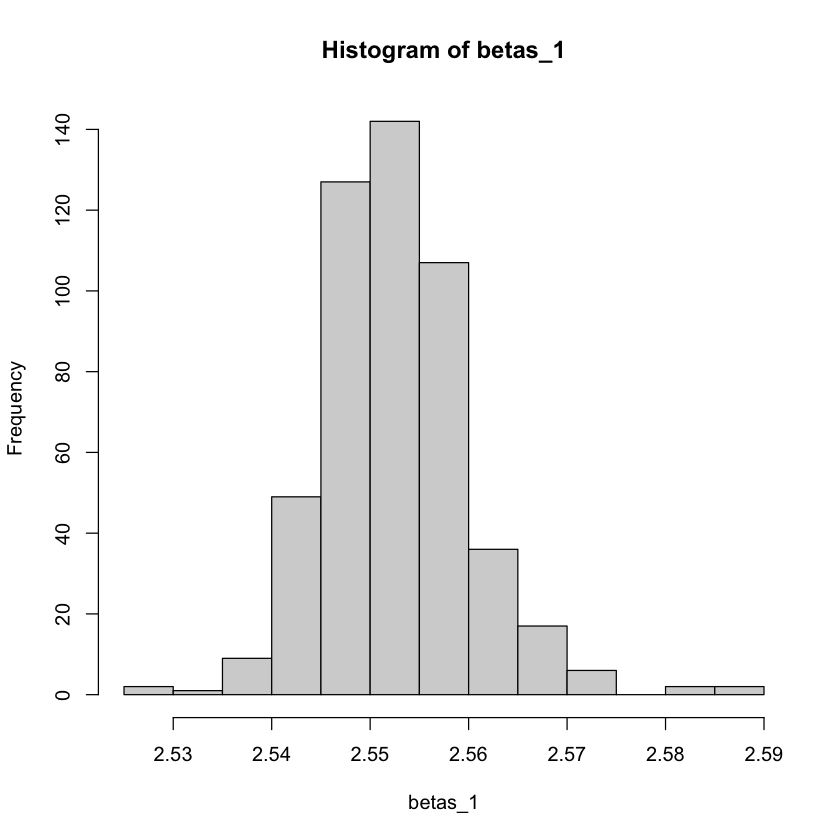

In [5]:
betas_1 <- c()
for (i in 1:500){
    e_2 = rnorm(n = 101, 0,1)
    e = e_2[2:101]
    x = e - 0.9*e_2[1:100]
    y = 10 + 2 * x + e 
    mod<-lm(y~x) 
    betas_1 <- c(betas_1, summary(mod)[[4]][2,1])
}

hist(betas_1)
mean(betas_1)
sd(betas_1)

[1] 9.996428

[1] 0.09309283

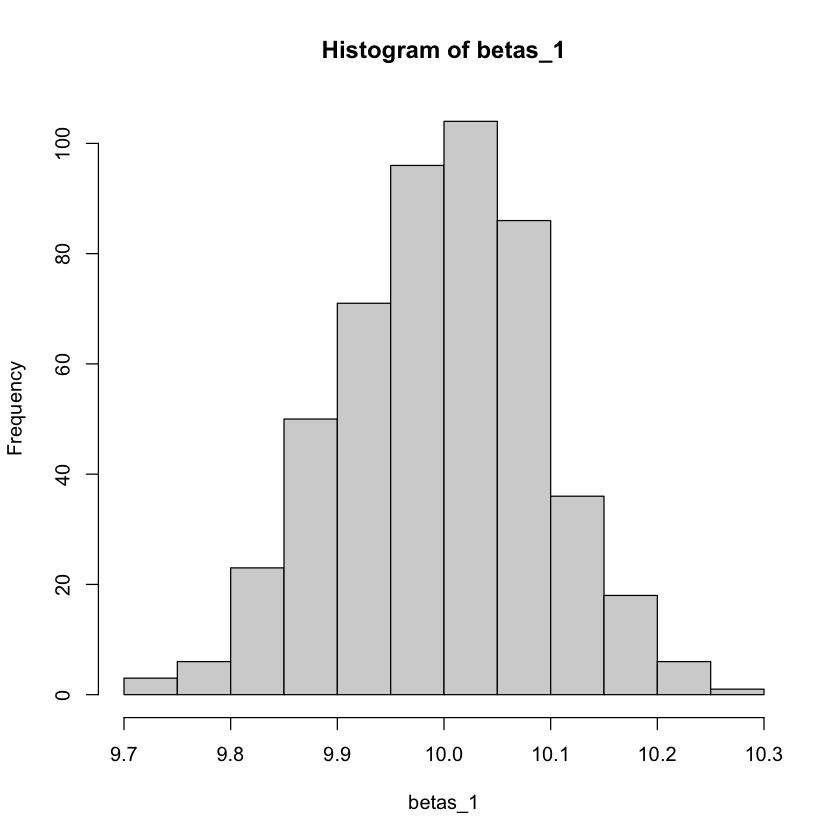

In [6]:
betas_1 <- c()
for (i in 1:500){
    e_2 = rnorm(n = 101, 0,1)
    e = e_2[2:101]
    x = e - 0.9*e_2[1:100]
    y = 10 + 2 * x + e 
    mod<-lm(y~x) 
    betas_1 <- c(betas_1, summary(mod)[[4]][1,1])
}

hist(betas_1)
mean(betas_1)
sd(betas_1)

In [7]:
mod <- lm(y~x) 

In [8]:
x_plot = seq(min(x),max(x), by =  0.01)
y_plot = summary(mod)[[4]][1,1] +  summary(mod)[[4]][2,1] * x_plot

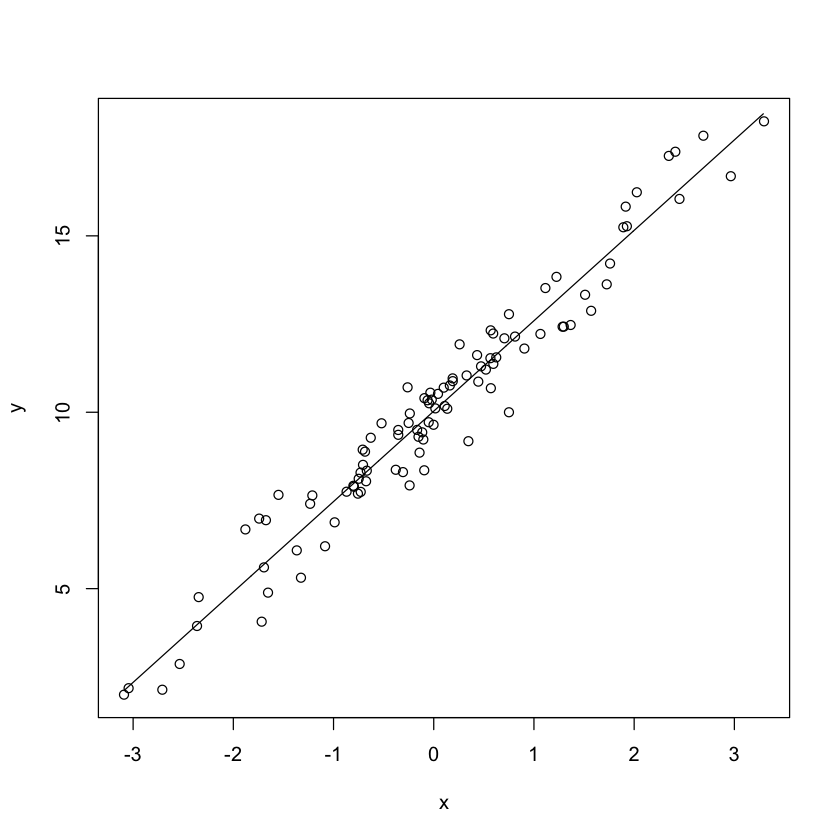

In [9]:
plot(x,y)
lines(x_plot, y_plot, type = 'l')

### Ivreg

In [33]:
e <- rnorm(2000,0,1)
u <- rnorm(2000,0,1)
v <- rnorm(2000,0,1)

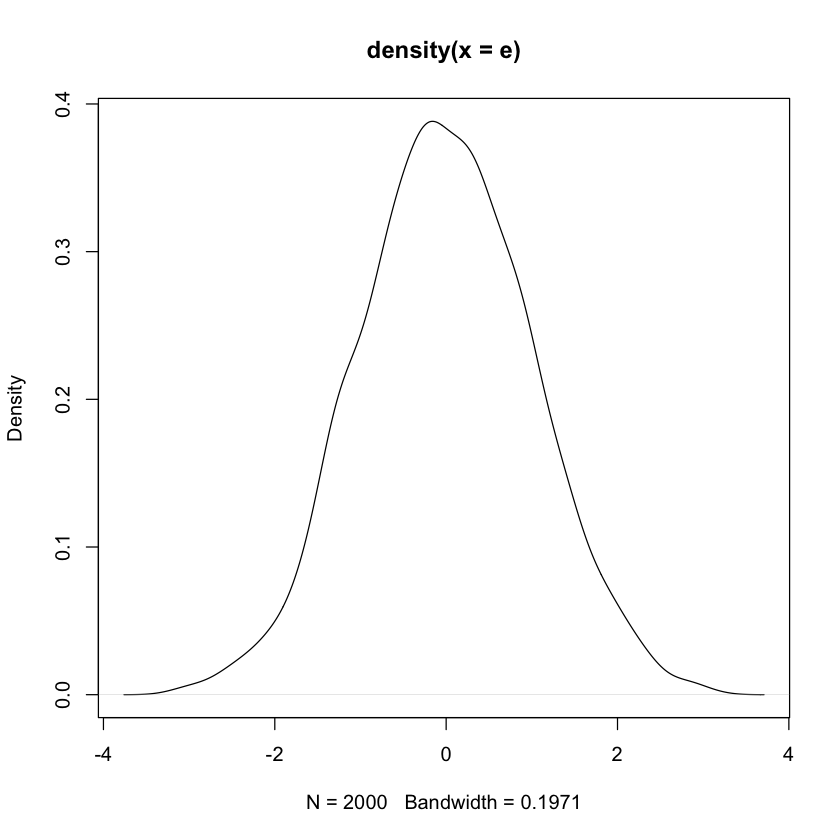

In [34]:
plot(density(e))

$ x_i = \epsilon_i + u_i$

In [35]:
x = e+u

$z_i = v_i + u_i$

In [53]:
z = v+e

$y_i = 2+0.4*x_i+\epsilon_i$

In [54]:
y = 2+0.4*x+e

In [55]:
mod0 = lm(y~x)
summary(mod0)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.51295 -0.47971  0.00451  0.48927  2.41724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0110     0.0161  124.91   <2e-16 ***
x             0.8932     0.0114   78.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7198 on 1998 degrees of freedom
Multiple R-squared:  0.7545,	Adjusted R-squared:  0.7543 
F-statistic:  6139 on 1 and 1998 DF,  p-value: < 2.2e-16


$H_0: \hat{b}=0.4$

In [56]:
(0.90167-0.4)/0.01132

[1] 44.31714

In [57]:
library(AER) # ivreg
#tsls          

In [58]:
mod_1step = lm(x~z)
summary(mod_1step)


Call:
lm(formula = x ~ z)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9209 -0.8233 -0.0130  0.8653  4.0079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04146    0.02785  -1.489    0.137    
z            0.46931    0.01962  23.917   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.246 on 1998 degrees of freedom
Multiple R-squared:  0.2226,	Adjusted R-squared:  0.2222 
F-statistic:   572 on 1 and 1998 DF,  p-value: < 2.2e-16


In [59]:
est_x <- mod_1step$fitted.values

In [60]:
mod_2step = lm(y~est_x)
summary(mod_2step)


Call:
lm(formula = y ~ est_x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6952 -0.6977 -0.0198  0.7486  3.1595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.02955    0.02419   83.89   <2e-16 ***
est_x        1.45653    0.03628   40.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.081 on 1998 degrees of freedom
Multiple R-squared:  0.4466,	Adjusted R-squared:  0.4463 
F-statistic:  1612 on 1 and 1998 DF,  p-value: < 2.2e-16


In [61]:
mod_iv = ivreg(y~x|z)
summary(mod_iv, diagnostics=TRUE)


Call:
ivreg(formula = y ~ x | z)

Residuals:
      Min        1Q    Median        3Q       Max 
-4.266321 -0.741253  0.007539  0.732922  3.985408 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.02955    0.02402   84.48   <2e-16 ***
x            1.45653    0.03602   40.44   <2e-16 ***

Diagnostic tests:
                  df1  df2 statistic p-value    
Weak instruments    1 1998       572  <2e-16 ***
Wu-Hausman          1 1997      1075  <2e-16 ***
Sargan              0   NA        NA      NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.073 on 1998 degrees of freedom
Multiple R-Squared: 0.4543,	Adjusted R-squared: 0.454 
Wald test:  1635 on 1 and 1998 DF,  p-value: < 2.2e-16 
